In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import pygmt
import numpy as np
import datetime as dt

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy_geopd/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
df_ctd=pd.read_csv('/fs/site5/eccc/crd/ccrn/users/rpg002/stat_downscaling-workshop/data/lineP_ctds/lineP_CTD_training.csv',skiprows=24)
df_ctd['Sta']=[int(el[1:]) for el in df_ctd.STATION_ID.values[:]]
df_ctd['tdt']=[dt.datetime.strptime(el,'%Y-%m-%d %H:%M:%S') for el in df_ctd.TIME]
df_ctd['YM']=[f"{el.year}{el.month:02}" for el in df_ctd['tdt']]
df_ctd['hasT']=[1 if el>0 else 0 for el in df_ctd['TEMPERATURE']]
df_ctd

,STATION_ID,TIME,LATITUDE,LONGITUDE,DEPTH,PRESSURE,PRESSURE_BIN_CNTR,TEMPERATURE,SALINITY,OXYGEN_MMOL_M3,OXYGEN_UMOL_KG,Sta,tdt,YM,hasT
0,P26,1969-08-26 22:18:00,50.000000,-145.00000,0.000000,0.000000,0.5,12.3000,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
1,P26,1969-08-26 22:18:00,50.000000,-145.00000,5.000000,5.043289,5.5,12.1500,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
2,P26,1969-08-26 22:18:00,50.000000,-145.00000,10.000000,10.086701,10.5,12.1200,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
3,P26,1969-08-26 22:18:00,50.000000,-145.00000,32.000000,32.279182,32.5,8.5000,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
4,P26,1969-08-26 22:18:00,50.000000,-145.00000,35.000000,35.305614,35.5,7.8000,32.5400,NaN,NaN,26,1969-08-26 22:18:00,196908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233798,P17,2020-02-13 12:39:40,49.350166,-135.66684,1974.521684,2001.000000,2001.5,1.9819,34.5800,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233799,P17,2020-02-13 12:39:40,49.350166,-135.66684,1975.503826,2002.000000,2002.5,1.9802,34.5804,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233800,P17,2020-02-13 12:39:40,49.350166,-135.66684,1976.485963,2003.000000,2003.5,1.9801,34.5804,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233801,P17,2020-02-13 12:39:40,49.350166,-135.66684,1977.468096,2004.000000,2004.5,1.9800,34.5805,53.52,52.0,17,2020-02-13 12:39:40,202002,1


In [3]:
dfctd1=df_ctd.loc[df_ctd.hasT>0,['Sta','YM','LONGITUDE','LATITUDE']].groupby(['Sta','YM']).mean().reset_index().groupby('Sta').agg(
    N=pd.NamedAgg(column="YM", aggfunc="count"),
    lat=pd.NamedAgg(column="LATITUDE", aggfunc="mean"),
    lon=pd.NamedAgg(column="LONGITUDE", aggfunc="mean"))

In [4]:
dfctd1

,N,lat,lon
Sta,,,
4,128,48.649902,-126.666532
5,101,48.691993,-127.166304
6,124,48.743247,-127.666420
7,109,48.776601,-128.166435
8,119,48.816668,-128.666679
9,113,48.856554,-129.166098
10,116,48.893238,-129.666533
11,109,48.933311,-130.166603
12,115,48.969913,-130.666538


In [5]:
#points1 = pygmt.project(center=[-126.67,48.65], endpoint=[-145,50], generate=.33) #true station end points
points1 = pygmt.project(center=[-144.9,50], endpoint=[-126.6,48.65], generate=.333)

In [6]:
npoints=38*2
lats=np.linspace(50,48.65,npoints)
lons=np.linspace(-145,-126.7,npoints)
print(lats)

[50.    49.982 49.964 49.946 49.928 49.91  49.892 49.874 49.856 49.838
 49.82  49.802 49.784 49.766 49.748 49.73  49.712 49.694 49.676 49.658
 49.64  49.622 49.604 49.586 49.568 49.55  49.532 49.514 49.496 49.478
 49.46  49.442 49.424 49.406 49.388 49.37  49.352 49.334 49.316 49.298
 49.28  49.262 49.244 49.226 49.208 49.19  49.172 49.154 49.136 49.118
 49.1   49.082 49.064 49.046 49.028 49.01  48.992 48.974 48.956 48.938
 48.92  48.902 48.884 48.866 48.848 48.83  48.812 48.794 48.776 48.758
 48.74  48.722 48.704 48.686 48.668 48.65 ]


Text(0.5, 1.0, 'Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')

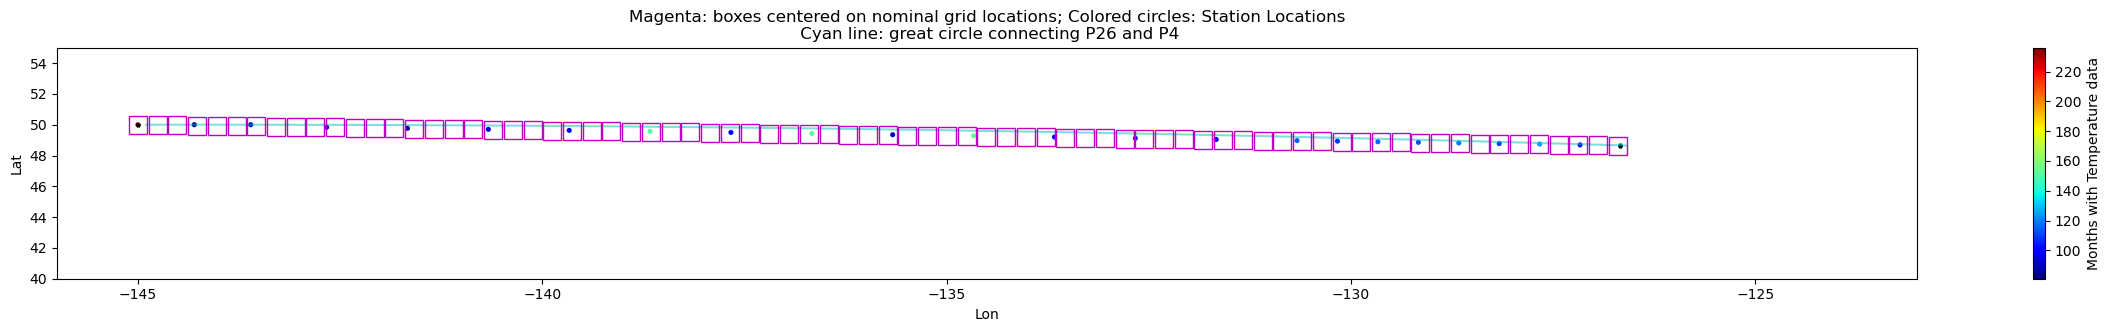

In [7]:
fig,ax=plt.subplots(1,1,figsize=(30,3))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-146,-123)
ax.set_ylim(40,55)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
#fig.savefig('gridbasis.png',bbox_inches='tight',dpi=100)

In [8]:
np.diff(lons)

array([0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244,
       0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244,
       0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244,
       0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244,
       0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244,
       0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244,
       0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244,
       0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244, 0.244,
       0.244, 0.244, 0.244])

In [9]:
#dx=.5*np.cosd(50) %.5 degrees lon in km/111
#dxlatdeg=.5*np.cosd(50)
dylat=np.diff(lons)[0]*np.cos(np.pi*50/180)

In [10]:
lats[0]

np.float64(50.0)

[np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(35)]


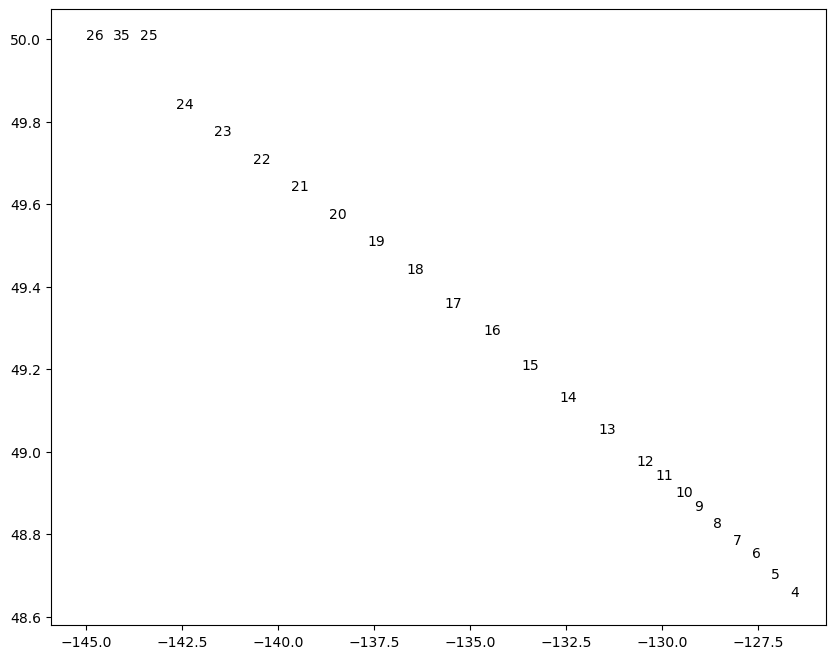

In [11]:
stations=df_ctd.Sta.unique()
print(sorted(stations))
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(df_ctd.LONGITUDE,df_ctd.LATITUDE,'w.',alpha=.2)
for ist in stations:
    lo,la=df_ctd.loc[df_ctd.Sta==ist,['LONGITUDE','LATITUDE']].values[0,:]
    ax.annotate(f"{ist}",xy=[lo,la],xycoords='data')

In [12]:
glon=np.expand_dims(lons,axis=0)
glat=np.expand_dims(lats,axis=0)
lonedges_lo=np.empty(npoints)
lonedges_hi=np.empty(npoints)
lonedges_lo[0]=lons[0]-(lons[1]-lons[0])/2
lonedges_lo[1:]=(lons[:-1]+lons[1:])/2
lonedges_hi[:-1]=(lons[:-1]+lons[1:])/2
lonedges_hi[-1]=lons[-1]+(lons[-1]-lons[-2])/2
latedges_lo=lats-dylat/2
latedges_hi=lats+dylat/2

In [13]:
dylat*111

np.float64(17.409259620750216)

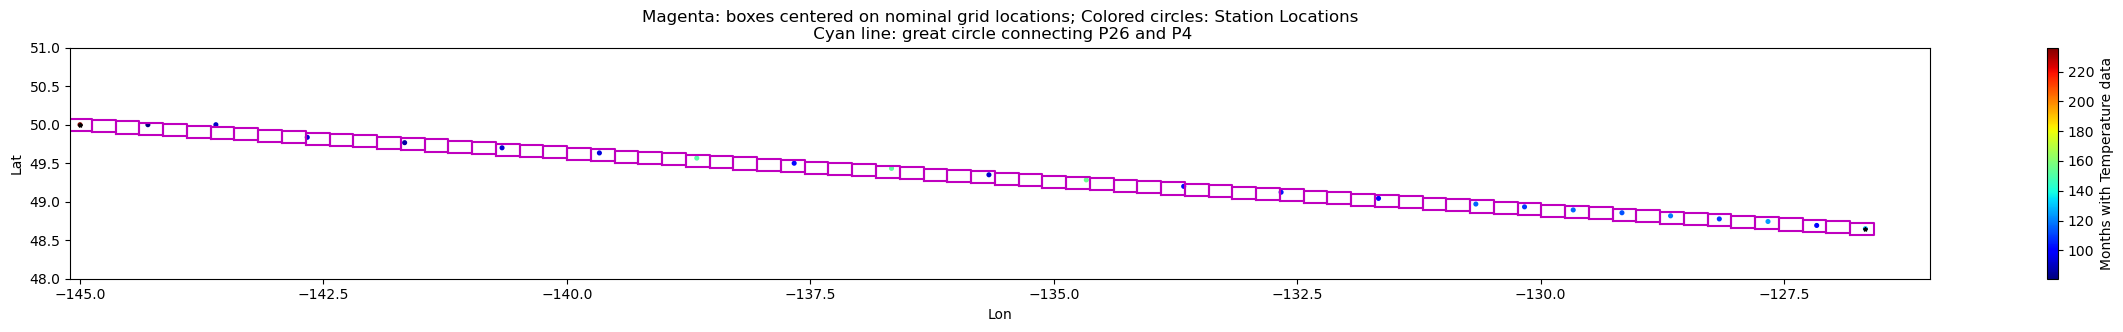

In [14]:
fig,ax=plt.subplots(1,1,figsize=(30,3))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
#ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
for ii in range(0,npoints):
    ax.plot([lonedges_lo[ii],lonedges_lo[ii],lonedges_hi[ii],lonedges_hi[ii],lonedges_lo[ii]],
            [latedges_lo[ii],latedges_hi[ii],latedges_hi[ii],latedges_lo[ii],latedges_lo[ii]],'m-')
#ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-145.1,-126)
ax.set_ylim(48,51)
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
fig.savefig('gridbasisHiRes.png',bbox_inches='tight',dpi=100)

In [15]:
lats

array([50.   , 49.982, 49.964, 49.946, 49.928, 49.91 , 49.892, 49.874,
       49.856, 49.838, 49.82 , 49.802, 49.784, 49.766, 49.748, 49.73 ,
       49.712, 49.694, 49.676, 49.658, 49.64 , 49.622, 49.604, 49.586,
       49.568, 49.55 , 49.532, 49.514, 49.496, 49.478, 49.46 , 49.442,
       49.424, 49.406, 49.388, 49.37 , 49.352, 49.334, 49.316, 49.298,
       49.28 , 49.262, 49.244, 49.226, 49.208, 49.19 , 49.172, 49.154,
       49.136, 49.118, 49.1  , 49.082, 49.064, 49.046, 49.028, 49.01 ,
       48.992, 48.974, 48.956, 48.938, 48.92 , 48.902, 48.884, 48.866,
       48.848, 48.83 , 48.812, 48.794, 48.776, 48.758, 48.74 , 48.722,
       48.704, 48.686, 48.668, 48.65 ])

In [16]:
def haversine(la0,lo0,la1,lo1):
    """ haversine formula with numpy array handling
    Calculates spherical distance between points on Earth in meters
    Compares elements of (la0,lo0) with (la1,lo1)
    Shapes must be compatible with numpy array broadcasting
    args: lats and lons in decimal degrees
    returns: distance on sphere with volumetric mean Earth radius in meters
    """
    rEarth=6371*1e3 # 
    # convert to radians
    la0=np.radians(la0)
    la1=np.radians(la1)
    lo0=np.radians(lo0)
    lo1=np.radians(lo1)
    theta=2*np.arcsin(np.sqrt(np.sin((la0-la1)/2)**2+np.cos(la0)*np.cos(la1)*np.sin((lo0-lo1)/2)**2))
    d=rEarth*theta
    return d

In [17]:
gridSpecs=pd.DataFrame(data=np.concatenate((glon,glat),axis=0).transpose(),columns=['nom_lon','nom_lat'],index=np.arange(0,npoints))
gridSpecs

,nom_lon,nom_lat
0,-145.000,50.000
1,-144.756,49.982
2,-144.512,49.964
3,-144.268,49.946
4,-144.024,49.928
...,...,...
71,-127.676,48.722
72,-127.432,48.704
73,-127.188,48.686
74,-126.944,48.668


In [18]:
gridSpecs['lonedges_lo']=lonedges_lo
gridSpecs['lonedges_hi']=lonedges_hi
gridSpecs['latedges_lo']=latedges_lo
gridSpecs['latedges_hi']=latedges_hi
gridSpecs['Sta']=None
gridSpecs['StaLon']=None
gridSpecs['StaLat']=None

In [19]:
lo=-129
la=48.8
dist=np.array([haversine(la,lo,la2,lo2) for la2, lo2 in zip(gridSpecs['nom_lat'],gridSpecs['nom_lon'])])
ix=np.argmin(dist)
ix

np.int64(66)

In [20]:
def getgridind(lo,la):
    dist=np.array([haversine(la,lo,la2,lo2) for la2, lo2 in zip(gridSpecs['nom_lat'],gridSpecs['nom_lon'])])
    ix=np.argmin(dist)
    return ix

for sta, irow in dfctd1.iterrows():
    gridind=getgridind(irow['lon'],irow['lat'])
    print(sta,gridind)
    if gridind>=0: 
        gridSpecs.at[gridind,'Sta']=sta
        gridSpecs.at[gridind,'StaLon']=irow['lon']
        gridSpecs.at[gridind,'StaLat']=irow['lat']
    else:
        print('Error:',sta,lat,lon,gridind)

4 75
5 73
6 71
7 69
8 67
9 65
10 63
11 61
12 59
13 55
14 51
15 46
16 42
17 38
18 34
19 30
20 26
21 22
22 18
23 14
24 10
25 6
26 0
35 3


In [21]:
f=xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/StatDownOc/data/NEP10k-ROMS/nep_revised_hind_moave_all_subset.nc')

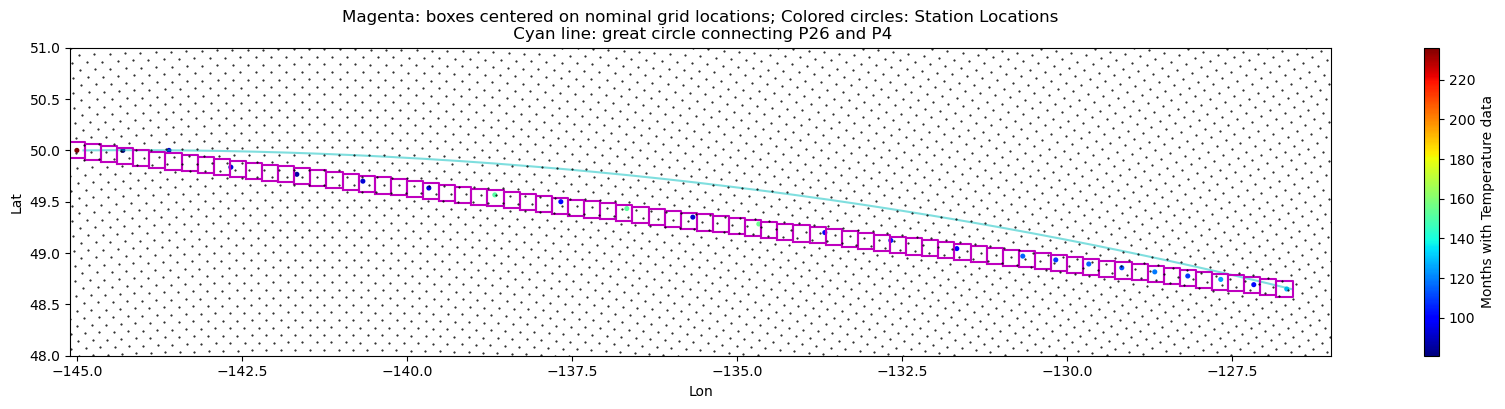

In [22]:
fig,ax=plt.subplots(1,1,figsize=(24,4))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
#ax.plot(-145,50,'k*',ms=3)
#ax.plot(-126.67,48.65,'k*',ms=3)
ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
for ii in range(0,npoints):
    ax.plot([gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_lo[ii]],
            [gridSpecs.latedges_lo[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_lo[ii],gridSpecs.latedges_lo[ii]],'m-')
ax.plot(f.lon_rho-360,f.lat_rho,'k.',ms=1)
#ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-145.1,-126)
ax.set_ylim(48,51)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
ax.set_aspect(1/np.cos(50*np.pi/180))
fig.savefig('gridoutHiRes.png',bbox_inches='tight',dpi=100)

In [23]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat
0,-145.000,50.000,-145.122,-144.878,49.92158,50.07842,26,-144.999964,50.000064
1,-144.756,49.982,-144.878,-144.634,49.90358,50.06042,None,None,None
2,-144.512,49.964,-144.634,-144.390,49.88558,50.04242,None,None,None
3,-144.268,49.946,-144.390,-144.146,49.86758,50.02442,35,-144.303145,50.00018
4,-144.024,49.928,-144.146,-143.902,49.84958,50.00642,None,None,None
...,...,...,...,...,...,...,...,...,...
71,-127.676,48.722,-127.798,-127.554,48.64358,48.80042,6,-127.66642,48.743247
72,-127.432,48.704,-127.554,-127.310,48.62558,48.78242,None,None,None
73,-127.188,48.686,-127.310,-127.066,48.60758,48.76442,5,-127.166304,48.691993
74,-126.944,48.668,-127.066,-126.822,48.58958,48.74642,None,None,None


In [24]:
gridSpecs['Index']=gridSpecs.index

In [25]:
gridSpecs.to_csv('gridspecsHiRes.csv')

In [26]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat,Index
0,-145.000,50.000,-145.122,-144.878,49.92158,50.07842,26,-144.999964,50.000064,0
1,-144.756,49.982,-144.878,-144.634,49.90358,50.06042,None,None,None,1
2,-144.512,49.964,-144.634,-144.390,49.88558,50.04242,None,None,None,2
3,-144.268,49.946,-144.390,-144.146,49.86758,50.02442,35,-144.303145,50.00018,3
4,-144.024,49.928,-144.146,-143.902,49.84958,50.00642,None,None,None,4
...,...,...,...,...,...,...,...,...,...,...
71,-127.676,48.722,-127.798,-127.554,48.64358,48.80042,6,-127.66642,48.743247,71
72,-127.432,48.704,-127.554,-127.310,48.62558,48.78242,None,None,None,72
73,-127.188,48.686,-127.310,-127.066,48.60758,48.76442,5,-127.166304,48.691993,73
74,-126.944,48.668,-127.066,-126.822,48.58958,48.74642,None,None,None,74


In [27]:
import numpy as np
.5*111*np.cos(50)

np.float64(53.55561458131229)